## import the important library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### import Train and Test data and append them

In [2]:
train_df = pd.read_excel("C:/Users/anjali suryawanshi/Desktop/Data_Train.xlsx")

In [3]:
test_df = pd.read_excel("C:/Users/anjali suryawanshi/Desktop/Test_set.xlsx")

In [4]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
big_df = train_df.append(test_df,sort=False)

In [7]:
big_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [8]:
big_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

# Feature engineering

#### In this step we mainly work on the data set and do some transformation like creating different bins of particular columns ,clean the messy data so that it can be used in our ML model 

##### In the column ‘Date_of_Journey’, we can see the date format is given as dd/mm/yyyy ,to tackle this divide the column into date,Month ,Year. 

In [9]:
#divide the date of journey cloumn  into date,month,year column
big_df['Date']= big_df['Date_of_Journey'].str.split('/').str[0]
big_df['Month']= big_df['Date_of_Journey'].str.split('/').str[1]
big_df['Year'] = big_df['Date_of_Journey'].str.split('/').str[2]

In [10]:
big_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [11]:
##drop the date of journey column
big_df=big_df.drop(['Date_of_Journey'],axis=1)

In [12]:
big_df.dtypes  ##check the data type of all the feature

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                object
Month               object
Year                object
dtype: object

In [13]:
##convert the data type of the column from object to int form
big_df['Date']= big_df['Date'].astype(int)
big_df['Month']= big_df['Month'].astype(int)
big_df['Year']= big_df['Year'].astype(int)

In [14]:
big_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
dtype: object

#### In the column ‘Arrival_Time’, we have combination of both time and month but we need only the time details out of it so we split the time into ‘Hours’ and ‘Minute’

In [15]:
# split the arrival time  column into arrival_hour,arrival_minute

big_df['Arrival_Time'] = big_df['Arrival_Time'].str.split(' ').str[0]
big_df['Arrival_Hour']= big_df['Arrival_Time'].str.split(':').str[0]
big_df['Arrival_minute']= big_df['Arrival_Time'].str.split(':').str[1]
big_df=big_df.drop(['Arrival_Time'],axis=1)

In [16]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


In [17]:
big_df.dtypes ##check the data type

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Arrival_Hour        object
Arrival_minute      object
dtype: object

In [18]:
##convert the data type into int form
big_df['Arrival_Hour']= big_df['Arrival_Hour'].astype(int)
big_df['Arrival_minute']= big_df['Arrival_minute'].astype(int)

In [19]:
big_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Arrival_Hour         int32
Arrival_minute       int32
dtype: object

In [20]:
##check is any Null value in total stop column
big_df[big_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_minute
9039,Air India,Delhi,Cochin,NaN,09:45,23h 40m,NaN,No info,7480.0,6,5,2019,9,25


#### This column is combination of number and a categorical variable like ‘1 stop,2stop’ . So we need only the number details from this column so we split that and take the number details only also we change the ‘non stop’ into ‘0 stop’ and convert the column into integer type

In [21]:
big_df['Total_Stops'] = big_df['Total_Stops'].fillna('1 stop')
big_df['Total_Stops']= big_df['Total_Stops'].replace('non-stop','0 stop')

In [22]:
big_df['Total_Stops']= big_df['Total_Stops'].str.split(' ').str[0]

In [23]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,0,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2,No info,13882.0,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1,No info,13302.0,1,3,2019,21,35


In [24]:
big_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Arrival_Hour         int32
Arrival_minute       int32
dtype: object

In [25]:
big_df['Total_Stops']= big_df['Total_Stops'].astype(int)

In [26]:
big_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Duration            object
Total_Stops          int32
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Arrival_Hour         int32
Arrival_minute       int32
dtype: object

#### As same as ‘Arrival_time’ .we split this column also in hour and minute and convert it into integer

In [27]:
big_df['Dep_Hour']= big_df['Dep_Time'].str.split(':').str[0]
big_df['Dep_Minute']= big_df['Dep_Time'].str.split(':').str[1]
big_df=big_df.drop(['Dep_Time'],axis=1)

In [28]:
big_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Duration            object
Total_Stops          int32
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Arrival_Hour         int32
Arrival_minute       int32
Dep_Hour            object
Dep_Minute          object
dtype: object

In [29]:
big_df['Dep_Hour']= big_df['Dep_Hour'].astype(int)
big_df['Dep_Minute']= big_df['Dep_Minute'].astype(int)

In [30]:
big_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Duration            object
Total_Stops          int32
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Arrival_Hour         int32
Arrival_minute       int32
Dep_Hour             int32
Dep_Minute           int32
dtype: object

##### The ‘Route’ columns mainly tell us that how many cities they have taken to reach from source to destination .This column is very important because based on the route they took will directly effect the price of the flight So We split the Route column to extract the information .Regarding the ‘Nan’ values we replace those ‘Nan’ values with ‘None’

In [31]:
# split the route column
big_df['Route_1']= big_df['Route'].str.split('→').str[0]
big_df['Route_2'] = big_df['Route'].str.split('→').str[1]
big_df['Route_3']= big_df['Route'].str.split('→').str[2]
big_df['Route_4']= big_df['Route'].str.split('→').str[3]
big_df['Route_5']= big_df['Route'].str.split('→').str[4]

In [32]:
big_df = big_df.drop(['Route'],axis=1)

big_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882.0,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50,BLR,NAG,DEL,NaN,NaN


In [33]:
big_df['Route_1'].fillna('None',inplace=True)
big_df['Route_2'].fillna('None',inplace=True)
big_df['Route_3'].fillna('None',inplace=True)
big_df['Route_4'].fillna('None',inplace=True)
big_df['Route_5'].fillna('None',inplace=True)

In [34]:
big_df[big_df['Price'].isnull()]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,Jet Airways,Delhi,Cochin,10h 55m,1,No info,NaN,6,6,2019,4,25,17,30,DEL,BOM,COK,None,None
1,IndiGo,Kolkata,Banglore,4h,1,No info,NaN,12,5,2019,10,20,6,20,CCU,MAA,BLR,None,None
2,Jet Airways,Delhi,Cochin,23h 45m,1,In-flight meal not included,NaN,21,5,2019,19,0,19,15,DEL,BOM,COK,None,None
3,Multiple carriers,Delhi,Cochin,13h,1,No info,NaN,21,5,2019,21,0,8,0,DEL,BOM,COK,None,None
4,Air Asia,Banglore,Delhi,2h 50m,0,No info,NaN,24,6,2019,2,45,23,55,BLR,DEL,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,23h 55m,1,No info,NaN,6,6,2019,20,25,20,30,CCU,DEL,BLR,None,None
2667,IndiGo,Kolkata,Banglore,2h 35m,0,No info,NaN,27,3,2019,16,55,14,20,CCU,BLR,None,None,None
2668,Jet Airways,Delhi,Cochin,6h 35m,1,No info,NaN,6,3,2019,4,25,21,50,DEL,BOM,COK,None,None
2669,Air India,Delhi,Cochin,15h 15m,1,No info,NaN,6,3,2019,19,15,4,0,DEL,BOM,COK,None,None


In [35]:
big_df['Price'].fillna(big_df['Price'].mean(),inplace=True)  ##fill the Nan vlaues with the mean of the price in price column

In [36]:
big_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882.0,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50,BLR,NAG,DEL,None,None


In [37]:
big_df = big_df.drop(['Duration'],axis=1) ##drop the duration column

In [38]:
big_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,12,5,2019,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,1,3,2019,21,35,16,50,BLR,NAG,DEL,None,None


##### To convert categorical text data into model-understandable numerical data, we use the Label Encoder class. So all we have to do, to label encode a column is import the LabelEncoder class from the sklearn library, fit and transform the column of the data, and then replace the existing text data with the new encoded data.


In [39]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
big_df["Airline"]=encoder.fit_transform(big_df['Airline'])
big_df["Source"]=encoder.fit_transform(big_df['Source'])
big_df["Destination"]=encoder.fit_transform(big_df['Destination'])
big_df["Additional_Info"]=encoder.fit_transform(big_df['Additional_Info'])
big_df["Route_1"]=encoder.fit_transform(big_df['Route_1'])
big_df["Route_2"]=encoder.fit_transform(big_df['Route_2'])
big_df["Route_3"]=encoder.fit_transform(big_df['Route_3'])
big_df["Route_4"]=encoder.fit_transform(big_df['Route_4'])
big_df["Route_5"]=encoder.fit_transform(big_df['Route_5'])

In [40]:
big_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,0,8,3897.0,24,3,2019,1,10,22,20,0,13,30,13,5
1,1,3,0,2,8,7662.0,1,5,2019,13,15,5,50,2,25,1,3,5
2,4,2,1,2,8,13882.0,9,6,2019,4,25,9,25,3,32,4,5,5
3,3,3,0,1,8,6218.0,12,5,2019,23,30,18,5,2,34,3,13,5
4,3,0,5,1,8,13302.0,1,3,2019,21,35,16,50,0,34,8,13,5


## Feature selection

### Import lasso regression and feature selection module
The classes in the sklearn.feature_selection module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets

In [46]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [47]:
df_train = big_df[0:10683]
df_test = big_df[10683:]

In [48]:
x = df_train.drop(['Price'],axis=1)
y = df_train.Price

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [50]:
model = SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [51]:
model.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [52]:
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [54]:
selected_feature = x_train.columns[(model.get_support())]

In [55]:
selected_feature

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Date', 'Month', 'Arrival_Hour', 'Arrival_minute', 'Dep_Hour',
       'Dep_Minute', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [56]:
x_train = x_train.drop(['Year'],axis=1)
x_test = x_test.drop(['Year'],axis=1)

In [57]:
from sklearn.model_selection import RandomizedSearchCV

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [60]:
#create tha random grid
random_grid = {'n_estimators': n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [61]:
#use the randomgrid for best hyperparamter
#first create the base model to tune

from sklearn.ensemble import RandomForestRegressor
Rf = RandomForestRegressor()

In [62]:

# Random search of parameters, using 5 fold cross validation, 
# search across 50 different combinations

rf_random = RandomizedSearchCV(estimator = Rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [63]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   3.9s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   3.0s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   4.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   7.2s
[CV] n_estimators=200, min_samples_spl

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 43.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [64]:
y_pred = rf_random.predict(x_test)

In [68]:
from sklearn import metrics

In [69]:
r2 = metrics.r2_score(y_test,y_pred)

In [70]:
r2

0.8712299873309015

C:\Users\anjali suryawanshi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


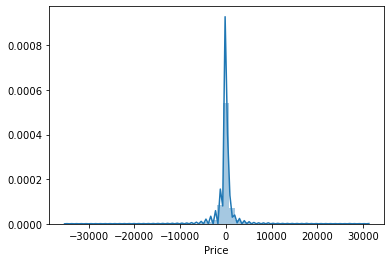

In [71]:
import seaborn as sns

sns.distplot(y_test-y_pred)

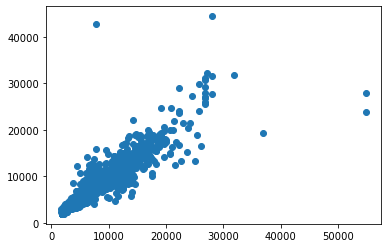

In [74]:
plt.scatter(y_test,y_pred)
